In [1]:
!pip install git+https://github.com/netbrainml/nbml.git
from nbml.pytorch import *
from nbml.workshops.cifar100.utils import *

  Cloning https://github.com/netbrainml/nbml.git to /tmp/pip-req-build-17bk_jak
  Running command git clone -q https://github.com/netbrainml/nbml.git /tmp/pip-req-build-17bk_jak
  Created wheel for nbml: filename=nbml-0.0.1-cp36-none-any.whl size=13124 sha256=c47c0ec2b439c94a7a2323ee93d65a56d690c3999171d6fd4f2bebf09e9e718e
  Stored in directory: /tmp/pip-ephem-wheel-cache-q4f5haq3/wheels/3a/b1/27/4431be29eb1fbe8f0912364e44fecc078167c19415ed958b11
Successfully built nbml


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
x_train, x_test, y_train, y_test = getCIFAR100()
tdl, vdl = torchCIFAR100(x_train, x_test, y_train, y_test, bs=128)

169009152/169001437 [==============================] - 11s 0us/step
arg_0: (50000, 32, 32, 3)
arg_1: (10000, 32, 32, 3)
arg_2: (50000, 1)
arg_3: (10000, 1)
arg_0: torch.Size([50000, 3, 32, 32])
arg_1: torch.Size([10000, 3, 32, 32])
arg_2: torch.Size([50000])
arg_3: torch.Size([10000])


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from fastai.torch_core import Module

class noop(Module):
    def __call__(self, x): return x

class Flatten(Module):
    def __call__(self,x): return torch.flatten(x, start_dim=1)

def BNConvBlock(nc, nf, ks=3, stride=1, pad=0, bn=False, mp=True):
    return nn.Sequential(nn.Conv2d(nc,nf,ks,stride,pad),
                         nn.BatchNorm2d(nf) if bn else noop(),
                         nn.ReLU(inplace=True),
                         nn.MaxPool2d(2,2) if mp else noop())

class BNConvNet(BasicTrainableClassifier):
    def __init__(self, ni, nc, bn=False):
        super().__init__()
        self.model = nn.Sequential(BNConvBlock(ni, 64, bn=bn, mp=False),
                                   BNConvBlock(64, 128, bn=bn),
                                   BNConvBlock(128, 256, bn=bn),
                                   BNConvBlock(256, 512, bn=bn),
                                   nn.AdaptiveMaxPool2d(1),
                                   Flatten(),
                                   nn.Linear(512, nc)
                                  )
        
    def forward(self,x): return self.model(x)

In [4]:
nobn = BNConvNet(3,100).cuda()

In [5]:
nobn.fit(tdl, vdl, cbs=True, epochs=10)

100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 1:
	Train Loss: 3.462 | Train Acc: 17.34%
	 Val. Loss: 3.491 |  Val. Acc: 16.75%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 2.972 | Train Acc: 26.69%
	 Val. Loss: 3.077 |  Val. Acc: 24.95%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 2.672 | Train Acc: 32.99%
	 Val. Loss: 2.847 |  Val. Acc: 30.11%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 2.396 | Train Acc: 38.50%
	 Val. Loss: 2.679 |  Val. Acc: 32.98%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 2.224 | Train Acc: 42.95%
	 Val. Loss: 2.573 |  Val. Acc: 36.08%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 6:
	Train Loss: 1.999 | Train Acc: 47.24%
	 Val. Loss: 2.458 |  Val. Acc: 37.89%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 7:
	Train Loss: 1.832 | Train Acc: 51.24%
	 Val. Loss: 2.398 |  Val. Acc: 39.18%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 8:
	Train Loss: 1.678 | Train Acc: 55.14%
	 Val. Loss: 2.379 |  Val. Acc: 40.42%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 9:
	Train Loss: 1.587 | Train Acc: 56.86%
	 Val. Loss: 2.413 |  Val. Acc: 40.65%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 10:
	Train Loss: 1.403 | Train Acc: 61.76%
	 Val. Loss: 2.376 |  Val. Acc: 41.87%


In [6]:
bn_m = BNConvNet(3,100, bn=True).cuda()

In [7]:
bn_m.fit(tdl, vdl, cbs=True, epochs=10)

100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 1:
	Train Loss: 2.663 | Train Acc: 33.83%
	 Val. Loss: 2.815 |  Val. Acc: 30.79%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 1.876 | Train Acc: 50.55%
	 Val. Loss: 2.144 |  Val. Acc: 43.98%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 1.609 | Train Acc: 56.87%
	 Val. Loss: 2.018 |  Val. Acc: 46.98%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 1.234 | Train Acc: 66.71%
	 Val. Loss: 1.857 |  Val. Acc: 51.20%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 0.935 | Train Acc: 75.30%
	 Val. Loss: 1.773 |  Val. Acc: 53.70%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 6:
	Train Loss: 0.696 | Train Acc: 81.24%
	 Val. Loss: 1.768 |  Val. Acc: 53.93%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 7:
	Train Loss: 0.527 | Train Acc: 86.39%
	 Val. Loss: 1.838 |  Val. Acc: 53.26%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 8:
	Train Loss: 0.299 | Train Acc: 93.52%
	 Val. Loss: 1.759 |  Val. Acc: 54.79%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 9:
	Train Loss: 0.158 | Train Acc: 97.39%
	 Val. Loss: 1.763 |  Val. Acc: 56.07%


100% (391 of 391) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (391 of 391) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 10:
	Train Loss: 0.097 | Train Acc: 98.85%
	 Val. Loss: 1.828 |  Val. Acc: 55.97%


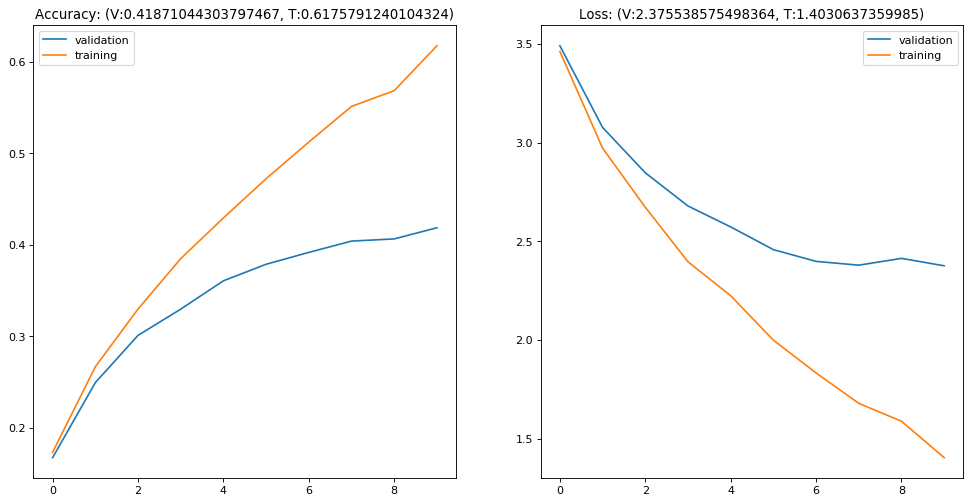

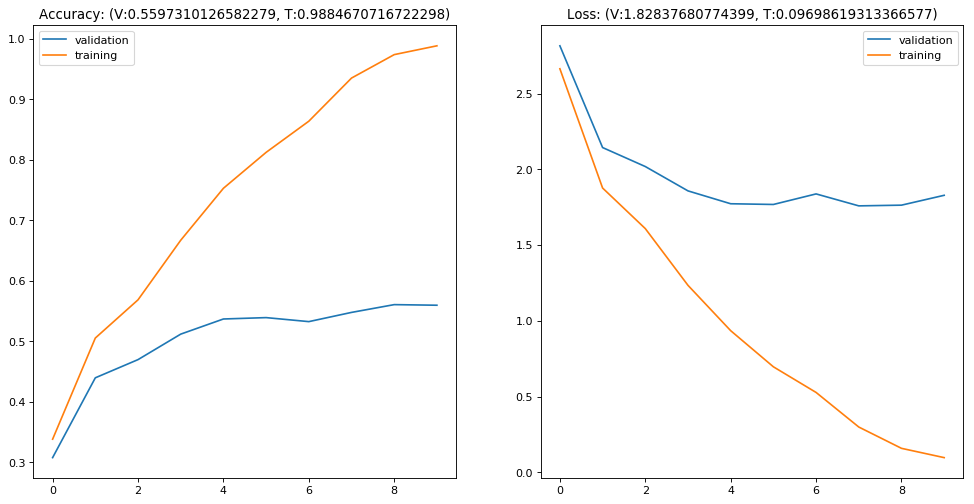

In [8]:
import matplotlib.pyplot as plt
nobn.plot
bn_m.plot